## Load libraries and read data

In [15]:
#import libraries
import numpy as np
import statistics
import math
from collections import Counter
from os import listdir
import pandas as pd
import matplotlib.pyplot as plt 
import pylab
from scipy.ndimage.filters import uniform_filter1d

In [16]:
#Set path
exp_path = "Your Experiment Path Folder Here"

In [17]:
#function to read in all data from a folder and combine each type of experiment into single set of data frames
def organise_data(path):
    basic_n = 0
    basic_pop_list = []
    basic_exp_list = []
    basic_conn_list = []
    osc_n = 0
    osc_pop_list = []
    osc_exp_list = []
    osc_conn_list = []
    wave_n = 0
    wave_pop_list = []
    wave_exp_list = []
    wave_conn_list = []
    for f in listdir(path):
        if f.startswith("experiment-basic"):
            pop = pd.read_csv(path + f + "/population.csv")
            pop.insert(0, 'dataset', basic_n, True)
            basic_pop_list.append(pop)
            exp = pd.read_csv(path + f + "/experiment.csv")
            exp.insert(0, 'dataset', basic_n, True)
            basic_exp_list.append(exp)
            conn = pd.read_csv(path + f + "/connections.csv")
            conn.insert(0, 'dataset', basic_n, True)
            basic_conn_list.append(conn)
            basic_n += 1
        elif f.startswith("experiment-oscillating"):
            pop = pd.read_csv(path + f + "/population.csv")
            pop.insert(0, 'dataset', osc_n, True)
            osc_pop_list.append(pop)
            exp = pd.read_csv(path + f + "/experiment.csv")
            exp.insert(0, 'dataset', osc_n, True)
            osc_exp_list.append(exp)
            conn = pd.read_csv(path + f + "/connections.csv")
            conn.insert(0, 'dataset', osc_n, True)
            osc_conn_list.append(conn)
            osc_n += 1
        elif f.startswith("experiment-expandingWave"):
            pop = pd.read_csv(path + f + "/population.csv")
            pop.insert(0, 'dataset', wave_n, True)
            wave_pop_list.append(pop)
            exp = pd.read_csv(path + f + "/experiment.csv")
            exp.insert(0, 'dataset', wave_n, True)
            wave_exp_list.append(exp)
            conn = pd.read_csv(path + f + "/connections.csv")
            conn.insert(0, 'dataset', wave_n, True)
            wave_conn_list.append(conn)
            wave_n += 1
    basic_pop = pd.concat(basic_pop_list, ignore_index=True)
    basic_exp = pd.concat(basic_exp_list, ignore_index=True)
    basic_conn = pd.concat(basic_conn_list, ignore_index=True)
    osc_pop = pd.concat(osc_pop_list, ignore_index=True)
    osc_exp = pd.concat(osc_exp_list, ignore_index=True)
    osc_conn = pd.concat(osc_conn_list, ignore_index=True)
    wave_pop = pd.concat(wave_pop_list, ignore_index=True)
    wave_exp = pd.concat(wave_exp_list, ignore_index=True)
    wave_conn = pd.concat(wave_conn_list, ignore_index=True)
    return([basic_pop, basic_exp, basic_conn, osc_pop, osc_exp, osc_conn, wave_pop, wave_exp, wave_conn])           

In [18]:
data = organise_data(exp_path) 

In [19]:
basic_pop = data[0]
basic_exp = data[1]
basic_conn = data[2]
osc_pop = data[3]
osc_exp = data[4]
osc_conn = data[5]
wave_pop = data[6]
wave_exp = data[7]
wave_conn = data[8]

## Population analysis

In [20]:
#insert time column to each pop data frame
time = []
for i in range(3000):
    for j in range(4):
        time.append(i)

time = time*10

basic_pop.insert(0, 'time', time, True)
osc_pop.insert(0, 'time', time, True)
wave_pop.insert(0, 'time', time, True)

In [21]:
#Split each pop dataset by arena
Arena0_basic_pop = basic_pop[basic_pop["ArenaName"]=="Arena0"]
Arena1_basic_pop = basic_pop[basic_pop["ArenaName"]=="Arena1"]
Arena2_basic_pop = basic_pop[basic_pop["ArenaName"]=="Arena2"]
Arena3_basic_pop = basic_pop[basic_pop["ArenaName"]=="Arena3"]

Arena0_osc_pop = osc_pop[osc_pop["ArenaName"]=="Arena0"]
Arena1_osc_pop = osc_pop[osc_pop["ArenaName"]=="Arena1"]
Arena2_osc_pop = osc_pop[osc_pop["ArenaName"]=="Arena2"]
Arena3_osc_pop = osc_pop[osc_pop["ArenaName"]=="Arena3"]

Arena0_wave_pop = wave_pop[wave_pop["ArenaName"]=="Arena0"]
Arena1_wave_pop = wave_pop[wave_pop["ArenaName"]=="Arena1"]
Arena2_wave_pop = wave_pop[wave_pop["ArenaName"]=="Arena2"]
Arena3_wave_pop = wave_pop[wave_pop["ArenaName"]=="Arena3"]

In [22]:
#%pylab inline
pylab.rcParams['figure.figsize'] = (20, 6)

#function to plot each population dataset individually
def plot_individual_pop(data):
    for i in range(10):
        subset = data[data["dataset"]== i]
        plt.subplot(2, 5, i+1)
        plt.plot(range(len(subset.iloc[:,3])), subset.iloc[:,3])
        plt.title(str(i))

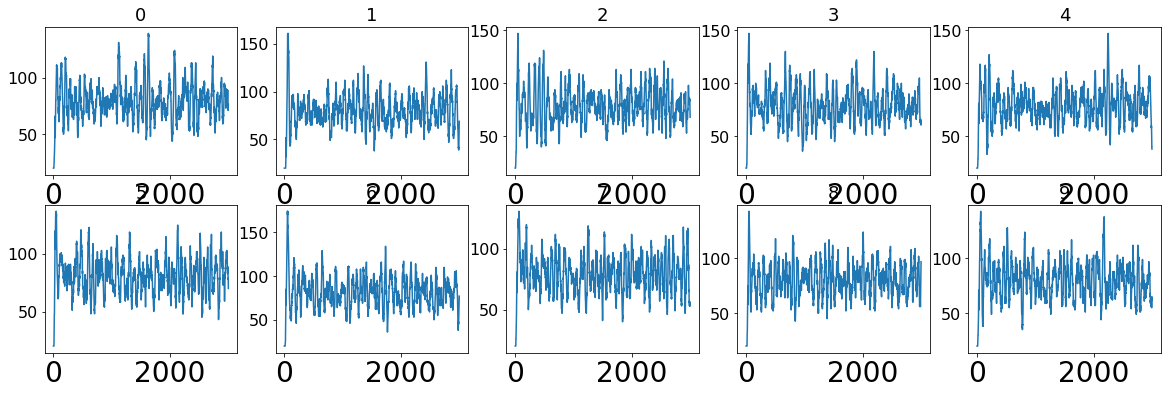

In [23]:
plot_individual_pop(Arena1_basic_pop)

In [112]:
#function to plot avg population of each arena, across all datasets
def plot_avg_pop(data):
    avg = data.groupby(['time'], as_index=False).agg({' Population Every 100 Ticks':['mean','std']})
    plt.errorbar(avg['time'], avg[' Population Every 100 Ticks']['mean'], yerr = avg[' Population Every 100 Ticks']['std'], ecolor = 'thistle', color='purple')
    plt.rc('xtick',labelsize=16)
    plt.rc('ytick',labelsize=16)
    plt.rc('axes', titlesize=18)  
    plt.rc('figure', titlesize=28)
    plt.ylim(0,165)
    
    ax = plt.gca()
    ax.set_xlabel('Time(100s of ticks)',position=(0.7, 0.),horizontalalignment='left', fontsize=18)
    ax.set_ylabel('Population', fontsize=20)    
    fig = plt.gcf()
    fig.subplots_adjust(hspace=.3)
    if(data['ArenaName'].iloc[-1] == "Arena0"):
        plt.title('High Conn, High Sharing')
    elif(data['ArenaName'].iloc[-1] == "Arena1"):
        plt.title('High Conn, Low Sharing')
    elif(data['ArenaName'].iloc[-1] == "Arena2"):
        plt.title('Low Conn, High Sharing')
    else:
        plt.title('Low Conn, Low Sharing')

In [113]:
pylab.rcParams['figure.figsize'] = (20, 10)

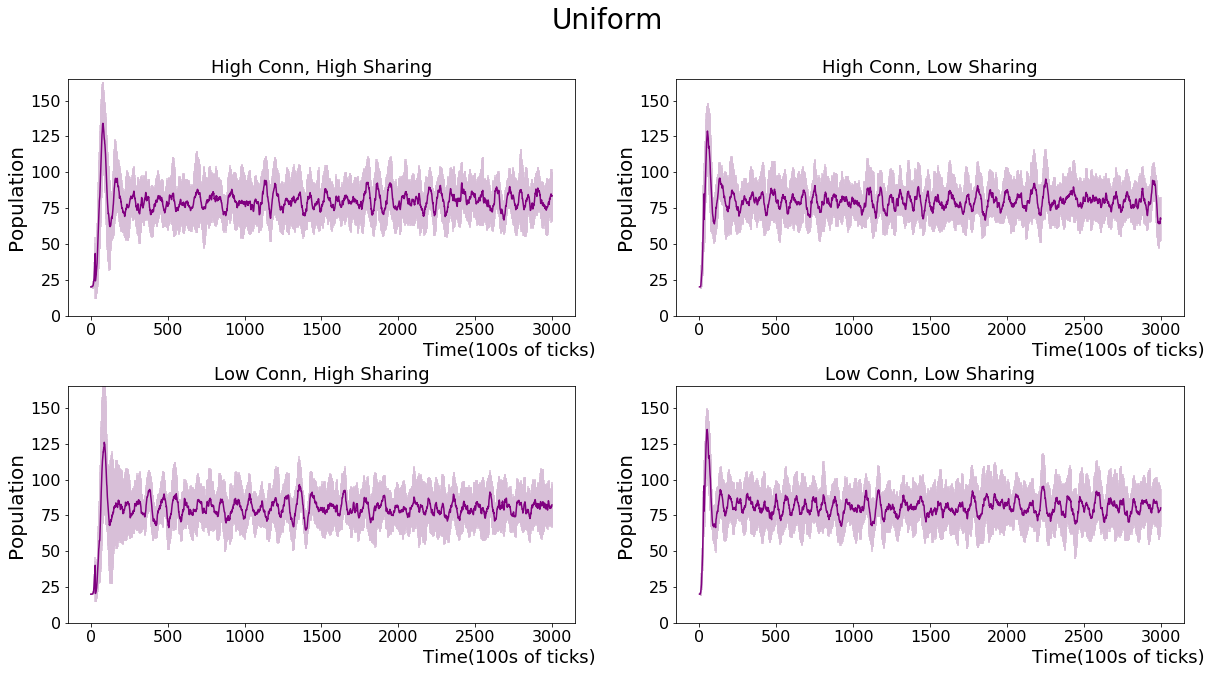

In [114]:
#basic 
f = plt.figure()
plt.subplot(2, 2, 1)
plot_avg_pop(Arena0_basic_pop)
plt.subplot(2, 2, 2)
plot_avg_pop(Arena1_basic_pop)
plt.subplot(2, 2, 3)
plot_avg_pop(Arena2_basic_pop)
plt.subplot(2, 2, 4)
plot_avg_pop(Arena3_basic_pop)
plt.suptitle('Uniform')

f.savefig("Uniform.pdf", bbox_inches='tight')

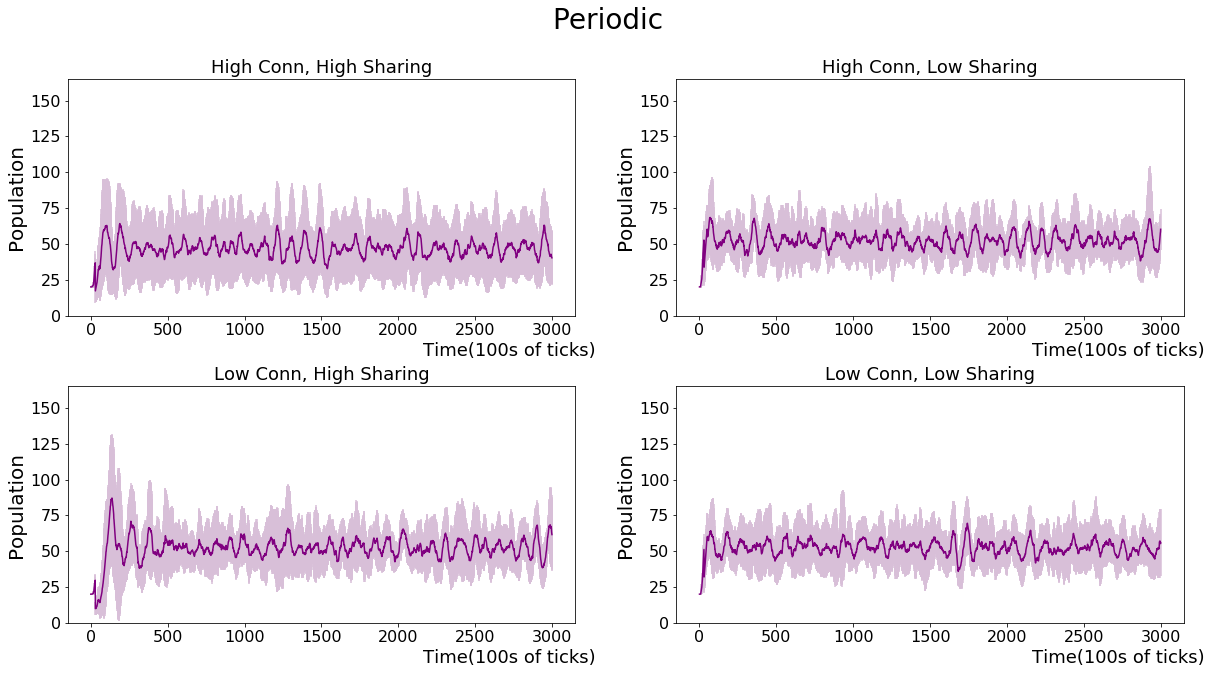

In [115]:
#oscillating
f = plt.figure()
plt.subplot(2, 2, 1)
plot_avg_pop(Arena0_osc_pop)
plt.subplot(2, 2, 2)
plot_avg_pop(Arena1_osc_pop)
plt.subplot(2, 2, 3)
plot_avg_pop(Arena2_osc_pop)
plt.subplot(2, 2, 4)
plot_avg_pop(Arena3_osc_pop)
plt.suptitle('Periodic')
f.savefig("Periodic.pdf", bbox_inches='tight')

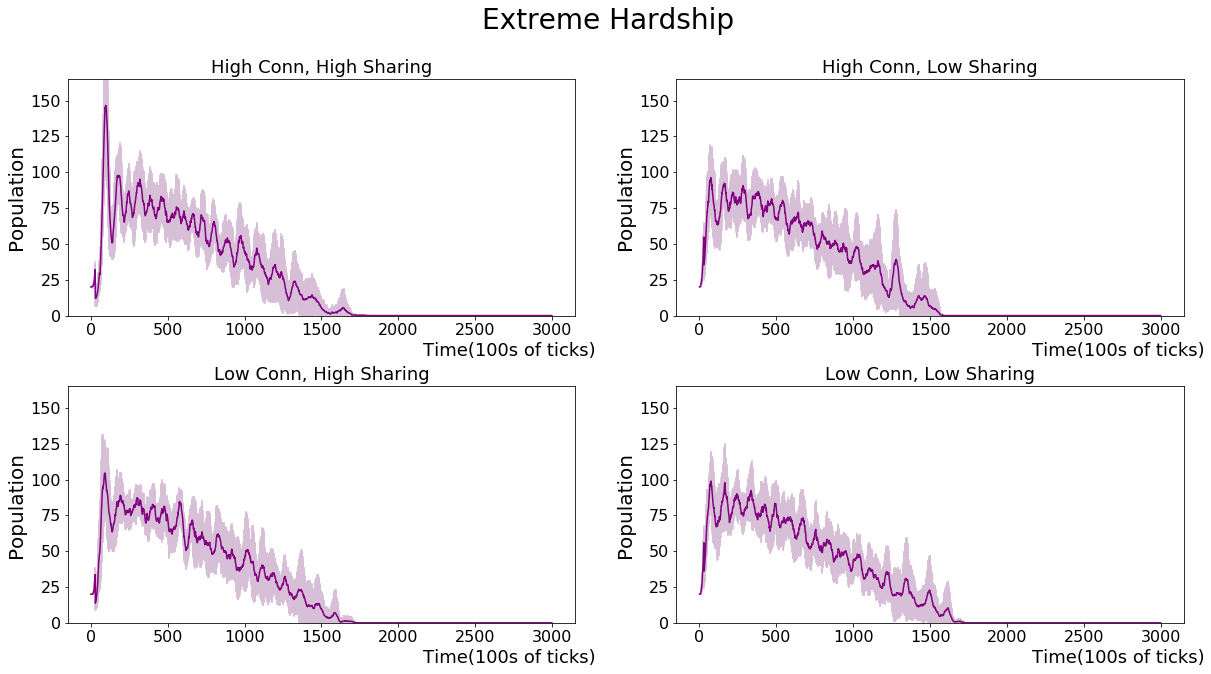

In [116]:
#expanding wave
f = plt.figure()
plt.subplot(2, 2, 1)
plot_avg_pop(Arena0_wave_pop)
plt.subplot(2, 2, 2)
plot_avg_pop(Arena1_wave_pop)
plt.subplot(2, 2, 3)
plot_avg_pop(Arena2_wave_pop)
plt.subplot(2, 2, 4)
plot_avg_pop(Arena3_wave_pop)
plt.suptitle('Extreme Hardship')
f.savefig("EH.pdf", bbox_inches='tight')

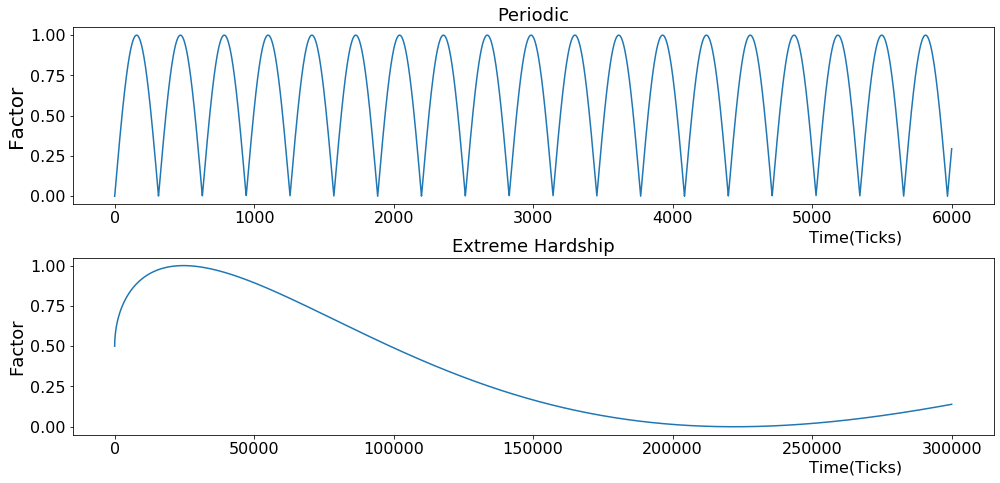

In [117]:
f = plt.figure()
plt.subplot(2, 1, 1)
plt.plot(list(range(6000)), [abs(math.sin(x/100)) for x in range(6000)])
ax = plt.gca()
ax.set_xlabel('Time(Ticks)',position=(0.8, 0.),horizontalalignment='left', fontsize=16)
ax.set_ylabel('Factor', fontsize=20) 
fig = plt.gcf()
fig.set_size_inches(16.5, 7.5)
plt.title('Periodic')
plt.subplots_adjust(hspace=.3)
plt.subplot(2, 1, 2)
plt.plot(np.linspace(0, 300000, num=300000), [0.5*(1+math.sin((x**(0.5))/100)) for x in range(300000)])
ax = plt.gca()
ax.set_xlabel('Time(Ticks)',position=(0.8, 0.),horizontalalignment='left', fontsize=16)
ax.set_ylabel('Factor', fontsize=18) 
plt.title('Extreme Hardship')
f.savefig("Functions.pdf", bbox_inches='tight')

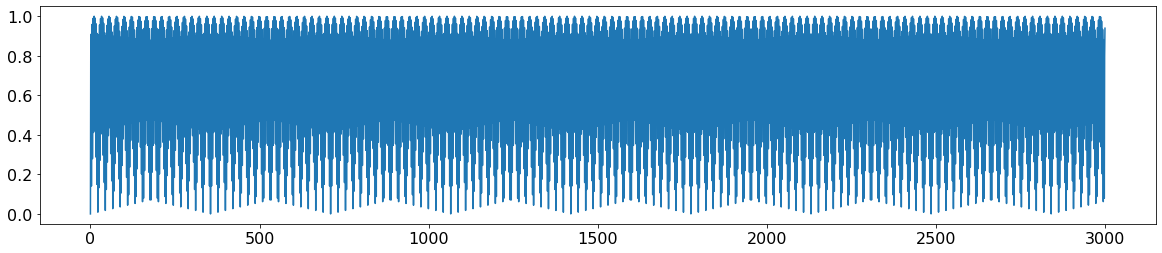

In [30]:
pylab.rcParams['figure.figsize'] = (20, 4)
plt.plot(list(range(3000)), [abs(math.sin(x)) for x in range(3000)])

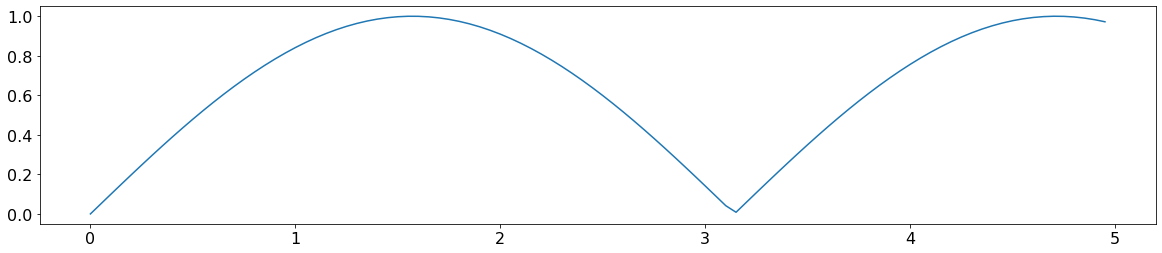

In [31]:
plt.plot([x*0.05 for x in range(100)], [abs(math.sin(x)) for x in [x*0.05 for x in range(100)]])

## Genotype/Phenotype analysis

In [32]:
# Assign time bins to each agent 100 epocs of 3000 ticks
basic_exp.insert(13,'TimeBins', pd.cut(basic_exp[' BirthTime'],bins=np.linspace(0, 300000, 100),labels = range(99)), True)
osc_exp.insert(13,'TimeBins', pd.cut(osc_exp[' BirthTime'],bins=np.linspace(0, 300000, 100), labels = range(99)), True)
wave_exp.insert(13,'TimeBins', pd.cut(wave_exp[' BirthTime'],bins=np.linspace(0, 300000, 100), labels = range(99)), True)

In [33]:
#Split each exp dataset by arena
def split_by_arena(data):
    Arena0_dat = data[data["ArenaName"]=="Arena0"]
    Arena1_dat = data[data["ArenaName"]=="Arena1"]
    Arena2_dat = data[data["ArenaName"]=="Arena2"]
    Arena3_dat = data[data["ArenaName"]=="Arena3"]
    return (Arena0_dat, Arena1_dat, Arena2_dat, Arena3_dat)

In [34]:
Arena0_basic_exp, Arena1_basic_exp, Arena2_basic_exp, Arena3_basic_exp= split_by_arena(basic_exp)
Arena0_osc_exp, Arena1_osc_exp, Arena2_osc_exp, Arena3_osc_exp= split_by_arena(osc_exp)
Arena0_wave_exp, Arena1_wave_exp, Arena2_wave_exp, Arena3_wave_exp= split_by_arena(wave_exp)

In [35]:
#Get column names
Arena0_basic_exp.columns

Index(['dataset', 'ArenaName', ' SharingPref', ' GeneSequence',
       ' ConnectionNumber', ' GenerationNum', ' AgentName', ' GenitorName',
       ' FoodCollected', ' FoodGiven', ' FoodReceived', ' BirthTime',
       ' DeathTime', 'TimeBins'],
      dtype='object')

### Sharing Pref

In [36]:
#Function to plot SharingPref across the 4 arenas in a condition
def plot_avg_SPx(data):
    avg = data.groupby([' GenerationNum'], as_index=False).agg({' SharingPref':['mean','std']})
    plt.errorbar(avg[' GenerationNum'], avg[' SharingPref']['mean'], yerr = avg[' SharingPref']['std'], ecolor = 'skyblue')
    plt.ylim(0,100)
    plt.rc('xtick',labelsize=11)
    plt.rc('ytick',labelsize=11)
    plt.rc('axes', titlesize=18)  
    plt.rc('figure', titlesize=28)
    ax = plt.gca()
    ax.set_xlabel('Generations',position=(0.8, 0.),horizontalalignment='left', fontsize=16)
    ax.set_ylabel('Sharing Preference')    

In [125]:
#Function to plot SharingPref across the 4 arenas in a condition using timebins instead
def plot_avg_SP(data):
    avg = data.groupby(['TimeBins'], as_index=False).agg({' SharingPref':['mean','std']})
    plt.errorbar(avg['TimeBins'], avg[' SharingPref']['mean'], yerr = avg[' SharingPref']['std'], ecolor = 'skyblue')
    plt.ylim(0,100)
    plt.rc('xtick',labelsize=14)
    plt.rc('ytick',labelsize=14)
    plt.rc('axes', titlesize=18)  
    plt.rc('figure', titlesize=28)
    
    ax = plt.gca()
    ax.set_xlabel('Time(x3000 ticks)',position=(0.8, 0.),horizontalalignment='left', fontsize=16)
    ax.set_ylabel('Sharing Preference', fontsize=18)    

In [126]:
pylab.rcParams['figure.figsize'] = (20, 10)

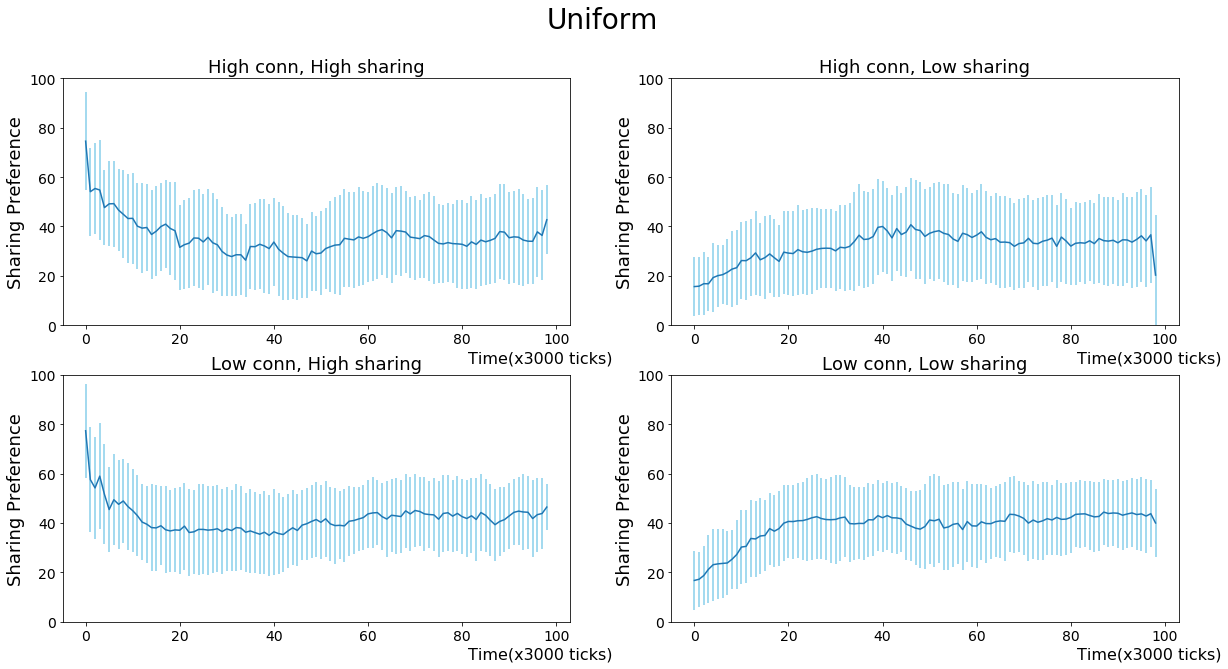

In [127]:
#basic 
f = plt.figure()
plt.subplot(2, 2, 1)
plot_avg_SP(Arena0_basic_exp)
plt.title('High conn, High sharing')
plt.subplot(2, 2, 2)
plot_avg_SP(Arena1_basic_exp)
plt.title('High conn, Low sharing')
plt.subplot(2, 2, 3)
plot_avg_SP(Arena2_basic_exp)
plt.title('Low conn, High sharing')
plt.subplot(2, 2, 4)
plot_avg_SP(Arena3_basic_exp)
plt.title('Low conn, Low sharing')
plt.suptitle('Uniform')
f.savefig("Usharing.pdf", bbox_inches='tight')

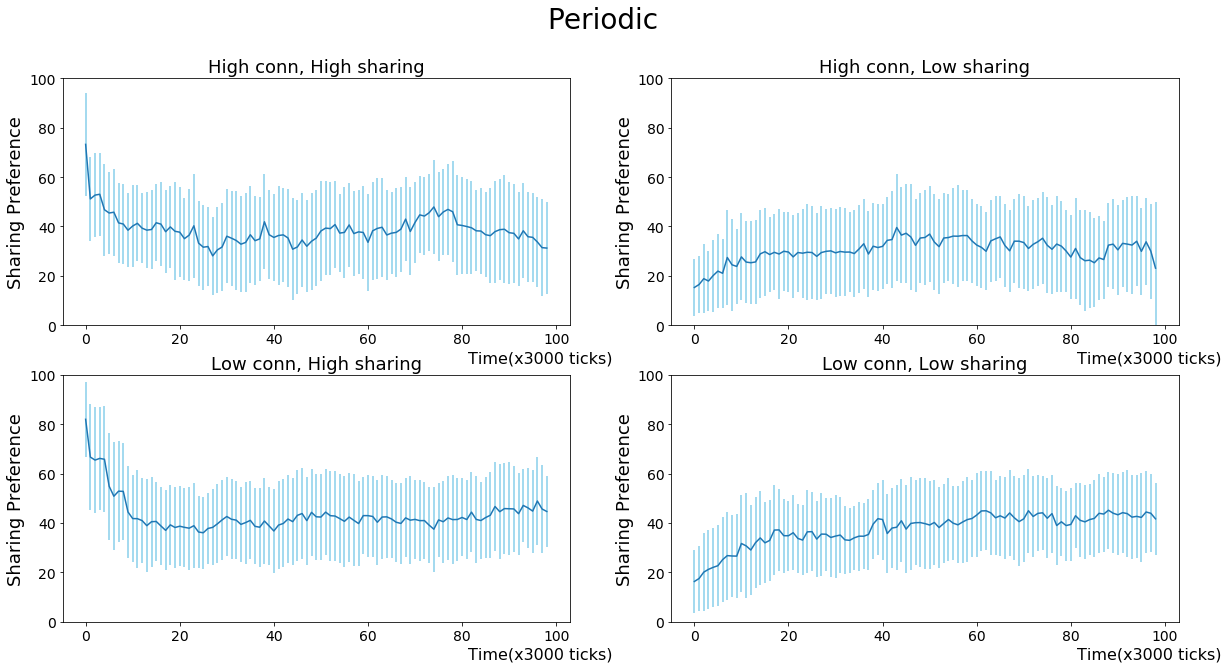

In [128]:
#oscillating 
f = plt.figure()

plt.subplot(2, 2, 1)
plot_avg_SP(Arena0_osc_exp)
plt.title('High conn, High sharing')
plt.subplot(2, 2, 2)
plot_avg_SP(Arena1_osc_exp)
plt.title('High conn, Low sharing')
plt.subplot(2, 2, 3)
plot_avg_SP(Arena2_osc_exp)
plt.title('Low conn, High sharing')
plt.subplot(2, 2, 4)
plot_avg_SP(Arena3_osc_exp)
plt.title('Low conn, Low sharing')
plt.suptitle('Periodic')

f.savefig("Psharing.pdf", bbox_inches='tight')

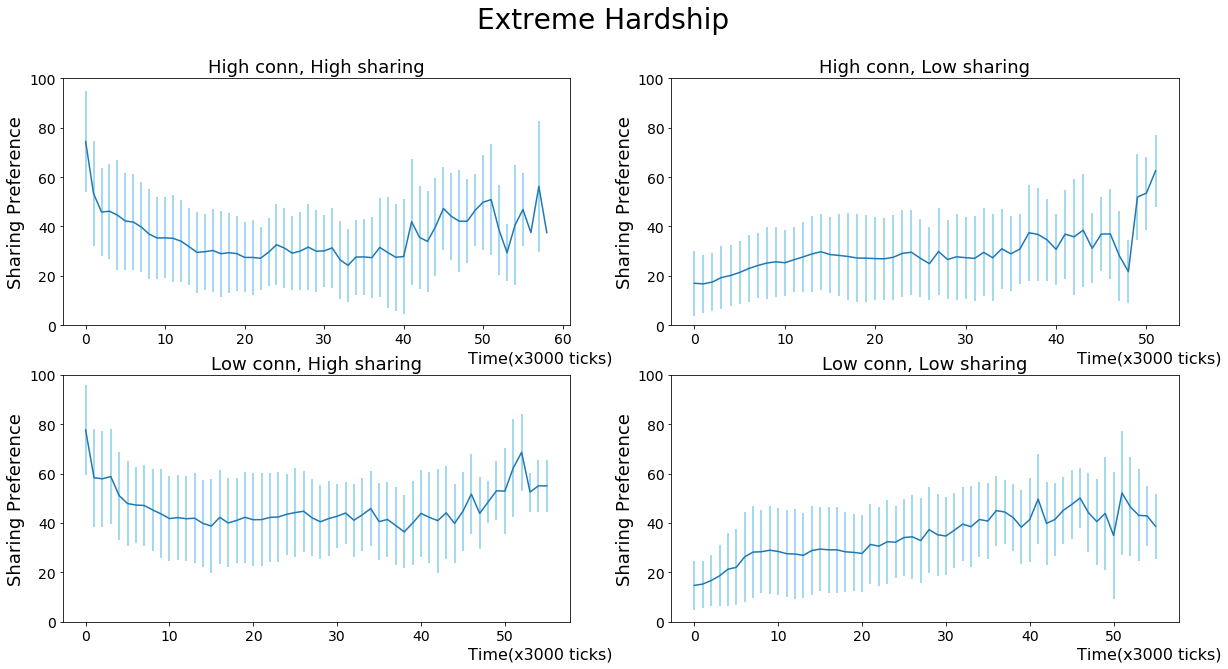

In [129]:
#expanding wave
#fig.set_size_inches(16.5, 10.5)
f = plt.figure()

plt.subplot(2, 2, 1)
plot_avg_SP(Arena0_wave_exp)
plt.title('High conn, High sharing')
plt.subplot(2, 2, 2)
plot_avg_SP(Arena1_wave_exp)
plt.title('High conn, Low sharing')
plt.subplot(2, 2, 3)
plot_avg_SP(Arena2_wave_exp)
plt.title('Low conn, High sharing')
plt.subplot(2, 2, 4)
plot_avg_SP(Arena3_wave_exp)
plt.title('Low conn, Low sharing')
plt.suptitle('Extreme Hardship')

f.savefig("Esharing.pdf", bbox_inches='tight')


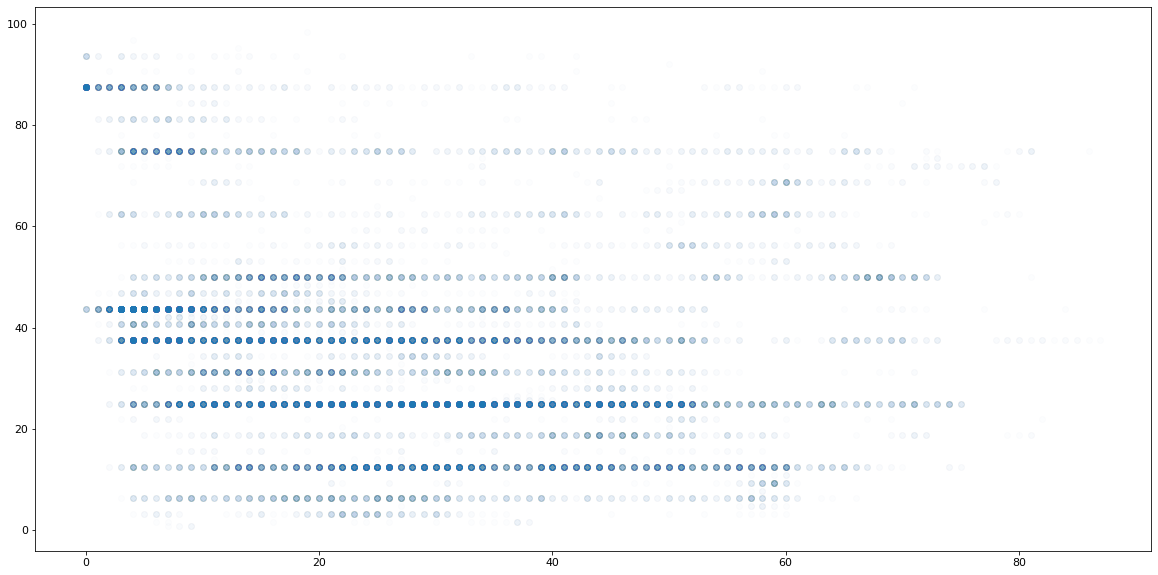

In [42]:
#scatter plot of an aggregated arena dataset
plt.plot(Arena0_wave_exp[' GenerationNum'], Arena0_wave_exp[' SharingPref'], 'o', alpha=0.01)

### Number of connections

In [43]:
#Function to plot connection num across the 4 arenas in each condition
def plot_avg_conn(data):
    avg = data.groupby([' GenerationNum'], as_index=False).agg({' ConnectionNumber':['mean','std']})
    plt.errorbar(avg[' GenerationNum'], avg[' ConnectionNumber']['mean'], yerr = avg[' ConnectionNumber']['std'], ecolor = 'y', color = 'k')
    ylim(0,25)

In [44]:
#Function to plot connection num across the 4 arenas in each condition, using timebins
def plot_avg_conn(data):
    avg = data.groupby(['TimeBins'], as_index=False).agg({' ConnectionNumber':['mean','std']})
    plt.errorbar(avg['TimeBins'], avg[' ConnectionNumber']['mean'], yerr = avg[' ConnectionNumber']['std'], ecolor = 'y', color = 'k')
    plt.ylim(0,25)

Text(0.5, 0.98, 'BASIC')

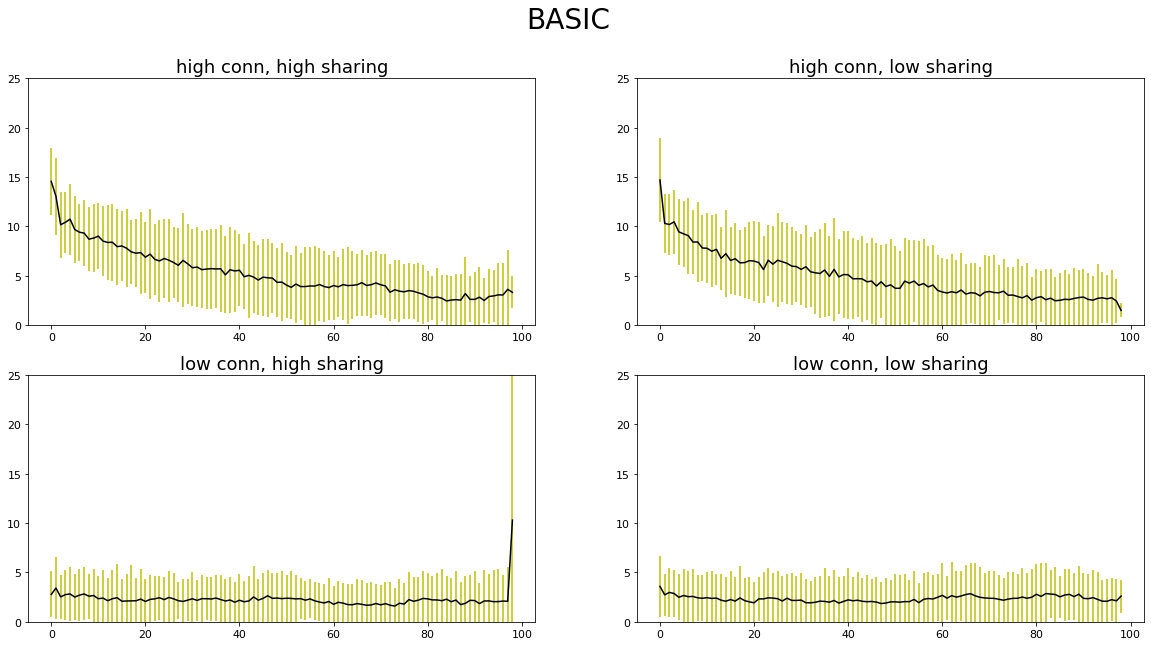

In [45]:
#basic 
plt.subplot(2, 2, 1)
plot_avg_conn(Arena0_basic_exp)
plt.title('high conn, high sharing')
plt.subplot(2, 2, 2)
plot_avg_conn(Arena1_basic_exp)
plt.title('high conn, low sharing')
plt.subplot(2, 2, 3)
plot_avg_conn(Arena2_basic_exp)
plt.title('low conn, high sharing')
plt.subplot(2, 2, 4)
plot_avg_conn(Arena3_basic_exp)
plt.title('low conn, low sharing')
plt.suptitle('BASIC')

Text(0.5, 0.98, 'OSCILLATING')

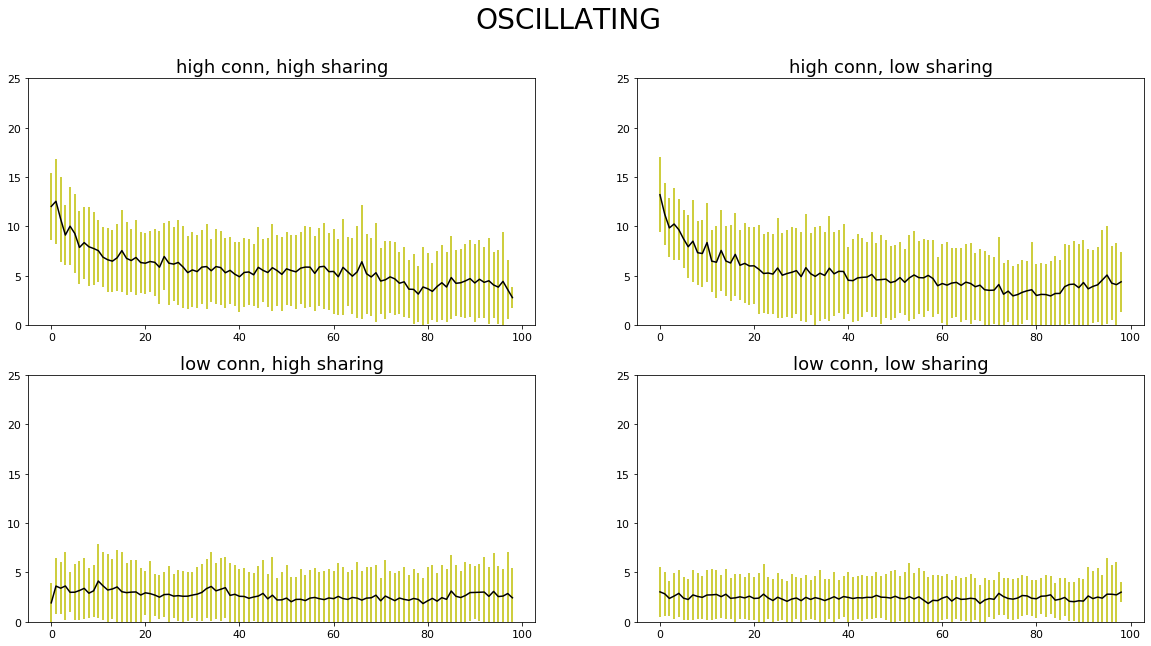

In [46]:
#oscillating 
plt.subplot(2, 2, 1)
plot_avg_conn(Arena0_osc_exp)
plt.title('high conn, high sharing')
plt.subplot(2, 2, 2)
plot_avg_conn(Arena1_osc_exp)
plt.title('high conn, low sharing')
plt.subplot(2, 2, 3)
plot_avg_conn(Arena2_osc_exp)
plt.title('low conn, high sharing')
plt.subplot(2, 2, 4)
plot_avg_conn(Arena3_osc_exp)
plt.title('low conn, low sharing')
plt.suptitle('OSCILLATING')

Text(0.5, 0.98, 'EXPANDING WAVE')

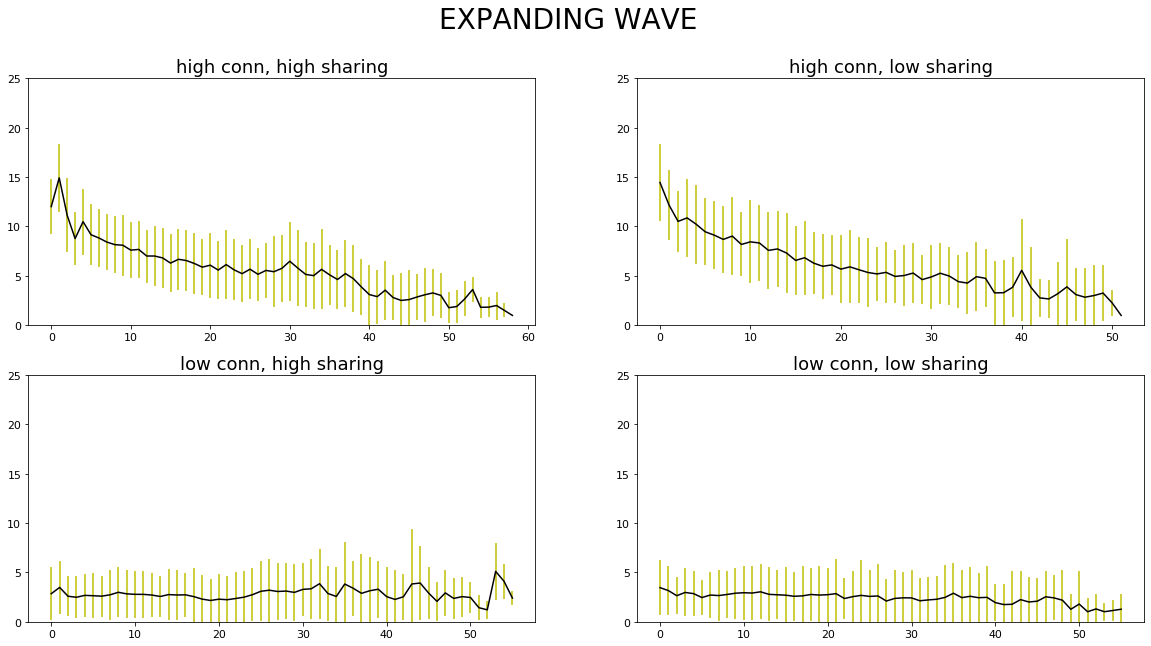

In [47]:
#expanding wave
plt.subplot(2, 2, 1)
plot_avg_conn(Arena0_wave_exp)
plt.title('high conn, high sharing')
plt.subplot(2, 2, 2)
plot_avg_conn(Arena1_wave_exp)
plt.title('high conn, low sharing')
plt.subplot(2, 2, 3)
plot_avg_conn(Arena2_wave_exp)
plt.title('low conn, high sharing')
plt.subplot(2, 2, 4)
plot_avg_conn(Arena3_wave_exp)
plt.title('low conn, low sharing')
plt.suptitle('EXPANDING WAVE')

In [48]:
#plot last several time bins of each of the 3 conditions against one another

basic_conn = list(basic_exp[basic_exp["TimeBins"]>=90][" ConnectionNumber"])
osc_conn = list(osc_exp[osc_exp["TimeBins"]>=90][" ConnectionNumber"])
wave_conn = list(wave_exp[wave_exp["TimeBins"]>=45][" ConnectionNumber"])

In [49]:
conn_data = [basic_conn, osc_conn, wave_conn]

In [50]:
pylab.rcParams['figure.figsize'] = (5, 3)

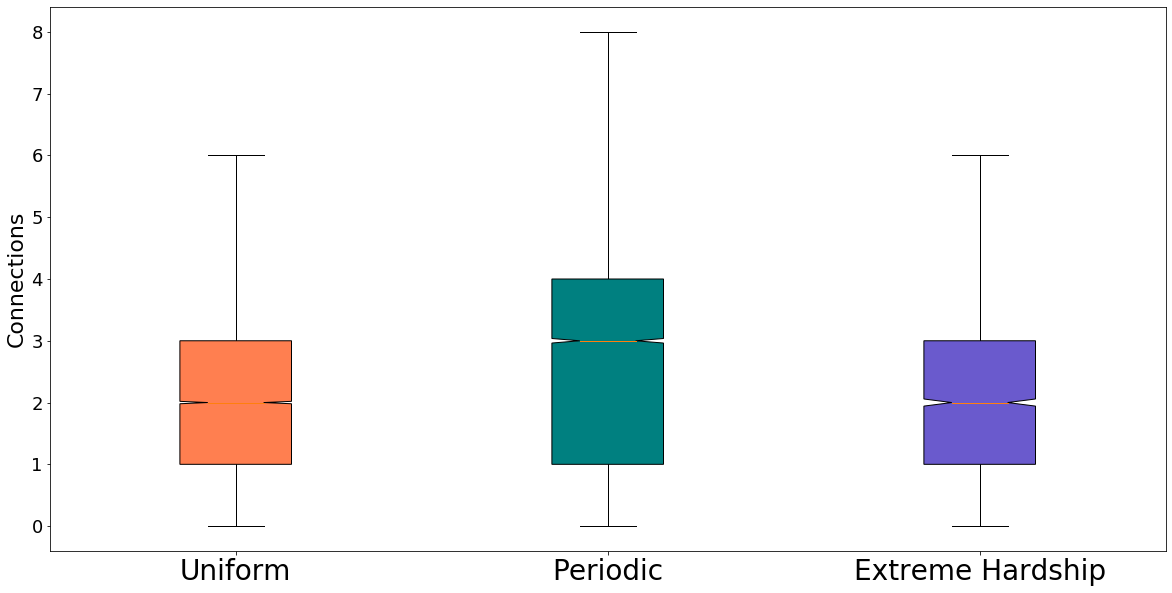

In [133]:
#box plot
f = plt.figure()

plt.rc('xtick',labelsize=28)
plt.rc('ytick',labelsize=18)
plt.rc('axes', titlesize=18)  
plt.rc('figure', titlesize=28)
ax = plt.gca()
ax.set_ylabel('Connections', fontsize=22)    
colors = ['coral', 'teal', 'slateblue']
box = plt.boxplot(conn_data, notch = True, sym="", labels = ['Uniform', 'Periodic', 'Extreme Hardship'],patch_artist=True)
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

f.savefig("Bars.pdf", bbox_inches='tight')
#plt.title('Number of connections per agent')

In [52]:
from scipy.stats import ttest_ind
#check the stats on this with t-tests:
print(ttest_ind(basic_conn, osc_conn, equal_var=False))
print(ttest_ind(osc_conn, wave_conn, equal_var=False))
print(ttest_ind(basic_conn, wave_conn, equal_var=False))

Ttest_indResult(statistic=-28.354149081467586, pvalue=2.1073793830715322e-174)
Ttest_indResult(statistic=18.422164303703948, pvalue=1.2731831682977212e-73)
Ttest_indResult(statistic=0.9104393047035433, pvalue=0.36264776350541317)


In [53]:
#no longer relevant...
from scipy.stats import sem
sem(basic_exp[basic_exp["TimeBins"]>=90][" ConnectionNumber"])

0.017575109492520172

In [54]:
#violin plot
#plt.violinplot(all_data, showmeans=True, showmedians=True)

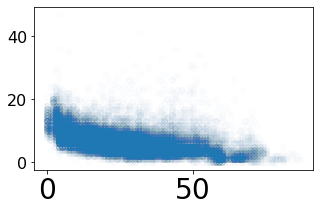

In [55]:
#scatter plot of an aggregated arena dataset
data = Arena0_wave_exp
plt.plot(data[' GenerationNum'], data[' ConnectionNumber'], 'o', alpha=0.01)

### Foods given

In [56]:
#Function to plot foods given across the 4 arenas in each condition
def plot_avg_food(data):
    avg = data.groupby([' GenerationNum'], as_index=False).agg({' FoodGiven':['mean','std']})
    plt.errorbar(avg[' GenerationNum'], avg[' FoodGiven']['mean'], yerr = avg[' FoodGiven']['std'], ecolor = 'y', color = 'g')
    #rolling_avg = uniform_filter1d(avg[' FoodGiven']['mean'], size=10)
    #plt.plot(rolling_avg, color = 'c')
    plt.ylim(0,500)

Text(0.5, 0.98, 'BASIC')

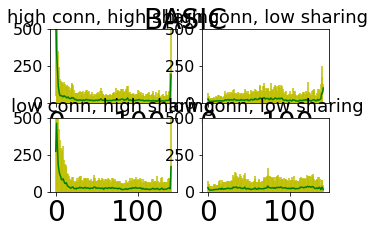

In [57]:
#basic 
plt.subplot(2, 2, 1)
plot_avg_food(Arena0_basic_exp)
plt.title('high conn, high sharing')
plt.subplot(2, 2, 2)
plot_avg_food(Arena1_basic_exp)
plt.title('high conn, low sharing')
plt.subplot(2, 2, 3)
plot_avg_food(Arena2_basic_exp)
plt.title('low conn, high sharing')
plt.subplot(2, 2, 4)
plot_avg_food(Arena3_basic_exp)
plt.title('low conn, low sharing')
plt.suptitle('BASIC')

Text(0.5, 0.98, 'OSCILLATING')

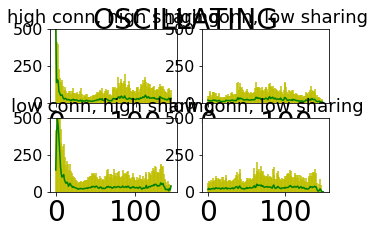

In [58]:
#oscillating 
plt.subplot(2, 2, 1)
plot_avg_food(Arena0_osc_exp)
plt.title('high conn, high sharing')
plt.subplot(2, 2, 2)
plot_avg_food(Arena1_osc_exp)
plt.title('high conn, low sharing')
plt.subplot(2, 2, 3)
plot_avg_food(Arena2_osc_exp)
plt.title('low conn, high sharing')
plt.subplot(2, 2, 4)
plot_avg_food(Arena3_osc_exp)
plt.title('low conn, low sharing')
plt.suptitle('OSCILLATING')

Text(0.5, 0.98, 'EXPANDING WAVE')

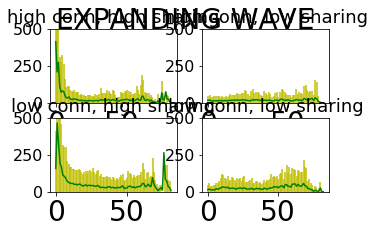

In [59]:
#expanding wave
plt.subplot(2, 2, 1)
plot_avg_food(Arena0_wave_exp)
plt.title('high conn, high sharing')
plt.subplot(2, 2, 2)
plot_avg_food(Arena1_wave_exp)
plt.title('high conn, low sharing')
plt.subplot(2, 2, 3)
plot_avg_food(Arena2_wave_exp)
plt.title('low conn, high sharing')
plt.subplot(2, 2, 4)
plot_avg_food(Arena3_wave_exp)
plt.title('low conn, low sharing')
plt.suptitle('EXPANDING WAVE')

In [60]:
#plot last several time bins of each of the 3 conditions against one another

basic_foods = list(basic_exp[basic_exp["TimeBins"]>=90][" FoodGiven"])
osc_foods = list(osc_exp[osc_exp["TimeBins"]>=90][" FoodGiven"])
wave_foods = list(wave_exp[wave_exp["TimeBins"]>=45][" FoodGiven"])

In [61]:
food_data = [basic_foods, osc_foods, wave_foods]

In [62]:
pylab.rcParams['figure.figsize'] = (5, 3)

Text(0.5, 1.0, 'Number of foods given per agent')

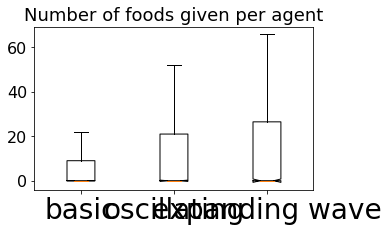

In [63]:
#box plot
plt.boxplot(food_data, notch = True, sym="", labels = ['basic', 'oscillating', 'expanding wave'])
plt.title('Number of foods given per agent')

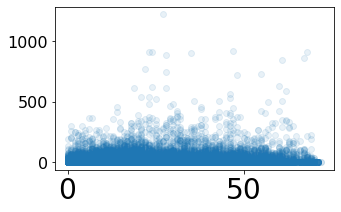

In [64]:
#scatter plot of an aggregated arena dataset
data = Arena1_wave_exp
plt.plot(data[' GenerationNum'], data[' FoodGiven'], 'o', alpha=0.1)

## Gene Frequencies

In [88]:
#to get last 'gen', get anyone who dies between end ticks - 3001(a lifespan), and end ticks. So the last set of agents to live a (potentially) full lifespan
death_cutoff = 300000-3001
death_cutoff

296999

In [89]:
#first gen histogram
def first_hist(arena_dat, ylab):
    all_genes_0 =[]
    for row in arena_dat[arena_dat[" GenerationNum"]==0][" GeneSequence"]:
        genes = row.split('.')
        all_genes_0 += genes
    pd.DataFrame(all_genes_0)[0].value_counts().plot(kind='bar')
    plt.ylabel(str(ylab))

In [90]:
#last gen histogram
def last_hist(arena_dat, death_cutoff):
    all_genes_last =[]
    for row in arena_dat[arena_dat[" DeathTime"] >= death_cutoff][" GeneSequence"]:
        genes = row.split('.')
        all_genes_last += genes
    pd.DataFrame(all_genes_last)[0].value_counts().plot(kind='bar')

In [91]:
#last several time slice histogram
def last_bins_hist(arena_dat, time_cutoff):
    all_genes_last =[]
    for row in arena_dat[arena_dat["TimeBins"] >= time_cutoff][" GeneSequence"]:
        genes = row.split('.')
        all_genes_last += genes
    pd.DataFrame(all_genes_last)[0].value_counts().plot(kind='bar')

In [92]:
pylab.rcParams['figure.figsize'] = (12, 16)

Text(0.5, 0.98, 'BASIC')

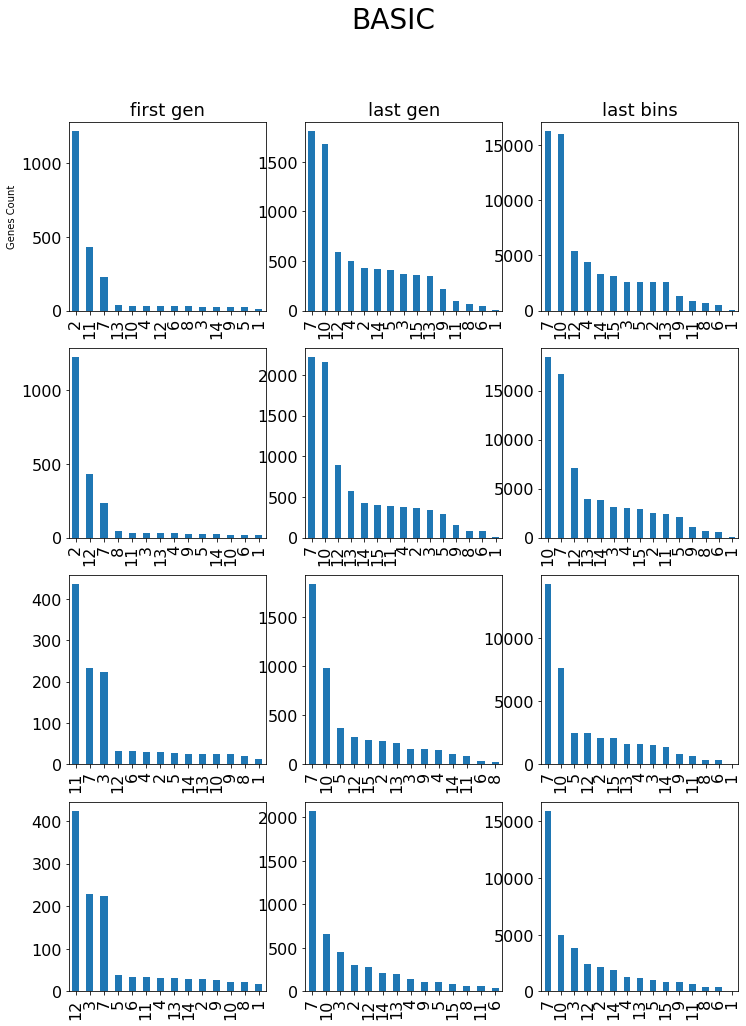

In [93]:
#basic
plt.subplot(4, 3, 1)
first_hist(Arena0_basic_exp,"Genes Count")
plt.title('first gen')
plt.subplot(4, 3, 2)
last_hist(Arena0_basic_exp, death_cutoff)
plt.title('last gen')
plt.subplot(4, 3, 3)
last_bins_hist(Arena0_basic_exp, 90)
plt.title('last bins')

plt.subplot(4, 3, 4)
first_hist(Arena1_basic_exp, "")
plt.subplot(4, 3, 5)
last_hist(Arena1_basic_exp, death_cutoff)
plt.subplot(4, 3, 6)
last_bins_hist(Arena1_basic_exp, 90)

plt.subplot(4, 3, 7)
first_hist(Arena2_basic_exp, "")
plt.subplot(4, 3, 8)
last_hist(Arena2_basic_exp, death_cutoff)
plt.subplot(4, 3, 9)
last_bins_hist(Arena2_basic_exp, 90)

plt.subplot(4, 3, 10)
first_hist(Arena3_basic_exp, "")
plt.subplot(4, 3, 11)
last_hist(Arena3_basic_exp, death_cutoff)
plt.subplot(4, 3, 12)
last_bins_hist(Arena3_basic_exp, 90)

plt.suptitle('BASIC')

Text(0.5, 0.98, 'OSCILLATING')

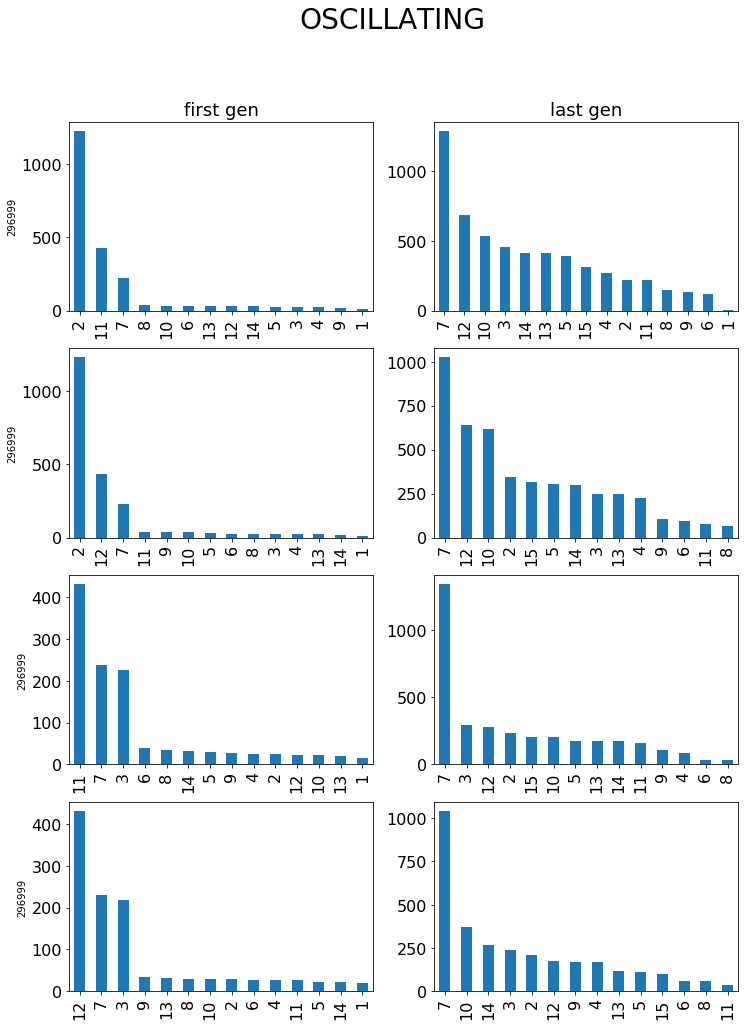

In [98]:
#oscillating
plt.subplot(4, 2, 1)
first_hist(Arena0_osc_exp, death_cutoff)
plt.title('first gen')
plt.subplot(4, 2, 2)
last_hist(Arena0_osc_exp, death_cutoff)
plt.title('last gen')
plt.subplot(4, 2, 3)
first_hist(Arena1_osc_exp, death_cutoff)
plt.subplot(4, 2, 4)
last_hist(Arena1_osc_exp, death_cutoff)
plt.subplot(4, 2, 5)
first_hist(Arena2_osc_exp, death_cutoff)
plt.subplot(4, 2, 6)
last_hist(Arena2_osc_exp, death_cutoff)
plt.subplot(4, 2, 7)
first_hist(Arena3_osc_exp, death_cutoff)
plt.subplot(4, 2, 8)
last_hist(Arena3_osc_exp, death_cutoff)
plt.suptitle('OSCILLATING')

TypeError: first_hist() missing 1 required positional argument: 'ylab'

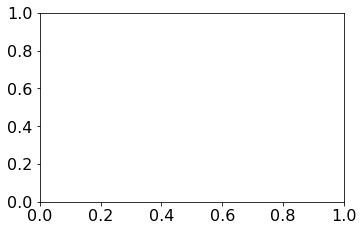

In [99]:
#expanding wave
plt.subplot(4, 2, 1)
first_hist(Arena0_wave_exp)
plt.title('first gen')
plt.subplot(4, 2, 2)
last_hist(Arena0_wave_exp, death_cutoff/2)
plt.title('last gen')
plt.subplot(4, 2, 3)
first_hist(Arena1_wave_exp)
plt.subplot(4, 2, 4)
last_hist(Arena1_wave_exp, death_cutoff/2)
plt.subplot(4, 2, 5)
first_hist(Arena2_wave_exp)
plt.subplot(4, 2, 6)
last_hist(Arena2_wave_exp, death_cutoff/2)
plt.subplot(4, 2, 7)
first_hist(Arena3_wave_exp)
plt.subplot(4, 2, 8)
last_hist(Arena3_wave_exp, death_cutoff/2)
plt.suptitle('EXPANDING WAVE')

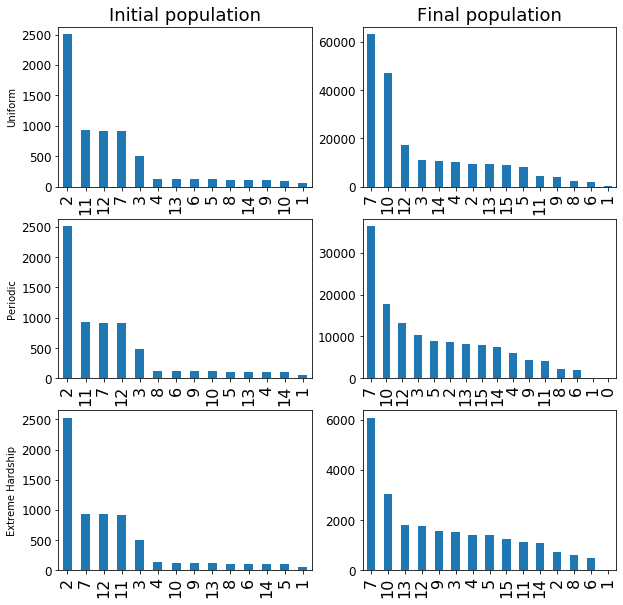

In [100]:
#combined histograms across all arenas, one for each condition
pylab.rcParams['figure.figsize'] = (10, 10)
plt.rc('ytick',labelsize=12)
plt.rc('xtick',labelsize=16)

plt.subplot(3, 2, 1)
first_hist(basic_exp, 'Uniform')
plt.title('Initial population')

plt.subplot(3, 2, 2)
last_bins_hist(basic_exp, 90)
plt.title('Final population')

plt.subplot(3, 2, 3)
first_hist(osc_exp, 'Periodic')

plt.subplot(3, 2, 4)
last_bins_hist(osc_exp, 90)

plt.subplot(3, 2, 5)
first_hist(wave_exp, 'Extreme Hardship')

plt.subplot(3, 2, 6)
last_bins_hist(wave_exp, 45)

#plt.suptitle('Gene frequencies')

### t-tests & other stats

In [ ]:
#first gen pool
def first_gen_pool(arena_dat):
    all_genes_0 =[]
    for row in arena_dat[arena_dat[" GenerationNum"]==0][" GeneSequence"]:
        genes = row.split('.')
        genes_int = [int(g) for g in genes]
        all_genes_0 += genes_int
        #genes_cat = pd.Series(all_genes_0, dtype="category")
    return all_genes_0

In [ ]:
#last gen pool
def last_gen_pool(arena_dat, death_cutoff):
    all_genes_last =[]
    for row in arena_dat[arena_dat[" DeathTime"] >= death_cutoff][" GeneSequence"]:
        genes = row.split('.')
        genes_int = [int(g) for g in genes]
        all_genes_last += genes_int
    return all_genes_last

In [ ]:
#last several time slice pool
def last_bins_pool(arena_dat, time_cutoff):
    all_genes_last =[]
    for row in arena_dat[arena_dat["TimeBins"] >= time_cutoff][" GeneSequence"]:
        genes = row.split('.')
        genes_int = [int(g) for g in genes]
        all_genes_last += genes_int
    return all_genes_last

In [ ]:
#convert these to a boolean sequence looking for presence of specific gene
def look_at_gene(num, gene_pool):
    new = []
    for i in gene_pool:
        if i == num:
            new.append(1)
        else:
            new.append(0)
    return new

In [ ]:
from scipy.stats import ttest_ind

In [ ]:
#function to do t-tests on last gen data, inputting gene and data:
def print_t_test(gene, data1, data2, death_cutoff1, death_cutoff2):
    print(ttest_ind(look_at_gene(gene, last_gen_pool(data1, death_cutoff1)), look_at_gene(gene, last_gen_pool(data2, death_cutoff2)), equal_var=False))

In [ ]:
#function to do t-tests on last bins data, inputting gene and data:
def print_t_test_b(gene, data1, data2, time_cutoff1, time_cutoff2):
    print(ttest_ind(look_at_gene(gene, last_bins_pool(data1, time_cutoff1)), look_at_gene(gene, last_bins_pool(data2, time_cutoff2)), equal_var=False))

In [ ]:
#compare all three conditions, gene 9
print_t_test_b(9, basic_exp, osc_exp, 90, 90)
print_t_test_b(9, osc_exp, wave_exp, 90, 45)
print_t_test_b(9, basic_exp, wave_exp, 90, 45)

In [ ]:
#compare all three conditions, gene 2
print_t_test_b(2, basic_exp, osc_exp, 90, 90)
print_t_test_b(2, osc_exp, wave_exp, 90, 45)
print_t_test_b(2, basic_exp, wave_exp, 90, 45)

In [ ]:
#compare all three conditions, gene 3
print_t_test_b(3, basic_exp, osc_exp, 90, 90)
print_t_test_b(3, osc_exp, wave_exp, 90, 45)
print_t_test_b(3, basic_exp, wave_exp, 90, 45)

In [ ]:
basic_3 = look_at_gene(3, last_bins_pool(basic_exp, 90))
osc_3 = look_at_gene(3, last_bins_pool(osc_exp, 90))
wave_3 = look_at_gene(3, last_bins_pool(wave_exp, 45))

In [ ]:
np.sum(basic_3)/len(basic_3)

In [ ]:
np.sum(osc_3)/len(osc_3)

In [ ]:
np.sum(wave_3)/len(wave_3)

In [ ]:
all_dat_3 = [basic_3, osc_3, wave_3]

In [ ]:
pylab.rcParams['figure.figsize'] = (5, 3)

In [ ]:
#box plot
plt.boxplot(all_dat_3, notch = True, sym="", labels = ['uniform', 'periodic', 'lengthening'])
plt.title('Frequency of gene 3 in final population')
plt.ylim(-0.001,0.001)

In [ ]:
#compare all three conditions, gene 5
print_t_test_b(5, basic_exp, osc_exp, 90, 90)
print_t_test_b(5, osc_exp, wave_exp, 90, 45)
print_t_test_b(5, basic_exp, wave_exp, 90, 45)

In [ ]:
#compare all three conditions, gene 4
print_t_test_b(4, basic_exp, osc_exp, 90, 90)
print_t_test_b(4, osc_exp, wave_exp, 90, 45)
print_t_test_b(4, basic_exp, wave_exp, 90, 45)

In [ ]:
#compare all three conditions, gene 11
print_t_test_b(11, basic_exp, osc_exp, 90, 90)
print_t_test_b(11, osc_exp, wave_exp, 90, 45)
print_t_test_b(11, basic_exp, wave_exp, 90, 45)

In [ ]:
#compare all three conditions, gene 12
print_t_test_b(12, basic_exp, osc_exp, 90, 90)
print_t_test_b(12, osc_exp, wave_exp, 90, 45)
print_t_test_b(12, basic_exp, wave_exp, 90, 45)

In [ ]:
#compare all three conditions, gene 13
print_t_test_b(13, basic_exp, osc_exp, 90, 90)
print_t_test_b(13, osc_exp, wave_exp, 90, 45)
print_t_test_b(13, basic_exp, wave_exp, 90, 45)

In [ ]:
#compare all three conditions, gene 14
print_t_test_b(14, basic_exp, osc_exp, 90, 90)
print_t_test_b(14, osc_exp, wave_exp, 90, 45)
print_t_test_b(14, basic_exp, wave_exp, 90, 45)

In [ ]:
#compare first gen to last gen, basic, for a specific gene (can keep changing gene num)
print(ttest_ind(look_at_gene(10, first_gen_pool(Arena0_basic_exp)), look_at_gene(10, last_gen_pool(Arena0_basic_exp, death_cutoff)), equal_var=False))
print(ttest_ind(look_at_gene(10, first_gen_pool(Arena1_basic_exp)), look_at_gene(10, last_gen_pool(Arena1_basic_exp, death_cutoff)), equal_var=False))
print(ttest_ind(look_at_gene(10, first_gen_pool(Arena2_basic_exp)), look_at_gene(10, last_gen_pool(Arena2_basic_exp, death_cutoff)), equal_var=False))
print(ttest_ind(look_at_gene(10, first_gen_pool(Arena3_basic_exp)), look_at_gene(10, last_gen_pool(Arena3_basic_exp, death_cutoff)), equal_var=False))

In [ ]:
#compare last gen oscillating to last gen expanding wave, gene 9
print(ttest_ind(look_at_gene(9, last_gen_pool(Arena0_osc_exp, death_cutoff)), look_at_gene(9, last_gen_pool(Arena0_wave_exp, death_cutoff/2)), equal_var=False))
print(ttest_ind(look_at_gene(9, last_gen_pool(Arena1_osc_exp, death_cutoff)), look_at_gene(9, last_gen_pool(Arena1_wave_exp, death_cutoff/2)), equal_var=False))
print(ttest_ind(look_at_gene(9, last_gen_pool(Arena2_osc_exp, death_cutoff)), look_at_gene(9, last_gen_pool(Arena2_wave_exp, death_cutoff/2)), equal_var=False))
print(ttest_ind(look_at_gene(9, last_gen_pool(Arena3_osc_exp, death_cutoff)), look_at_gene(9, last_gen_pool(Arena3_wave_exp, death_cutoff/2)), equal_var=False))

In [ ]:
#compare last gen oscillating to last gen expanding wave, gene 9, combining all arenas
print(ttest_ind(look_at_gene(9, last_gen_pool(osc_exp, death_cutoff)), look_at_gene(9, last_gen_pool(wave_exp, death_cutoff/2)), equal_var=False))

In [ ]:
#compare last gen oscillating to last gen expanding wave, gene 10
print(ttest_ind(look_at_gene(10, last_gen_pool(Arena0_osc_exp, death_cutoff)), look_at_gene(10, last_gen_pool(Arena0_wave_exp, death_cutoff/2)), equal_var=False))
print(ttest_ind(look_at_gene(10, last_gen_pool(Arena1_osc_exp, death_cutoff)), look_at_gene(10, last_gen_pool(Arena1_wave_exp, death_cutoff/2)), equal_var=False))
print(ttest_ind(look_at_gene(10, last_gen_pool(Arena2_osc_exp, death_cutoff)), look_at_gene(10, last_gen_pool(Arena2_wave_exp, death_cutoff/2)), equal_var=False))
print(ttest_ind(look_at_gene(10, last_gen_pool(Arena3_osc_exp, death_cutoff)), look_at_gene(10, last_gen_pool(Arena3_wave_exp, death_cutoff/2)), equal_var=False))

In [ ]:
#combining all arenas
print(ttest_ind(look_at_gene(10, last_gen_pool(osc_exp, death_cutoff)), look_at_gene(10, last_gen_pool(wave_exp, death_cutoff/2)), equal_var=False))

In [ ]:
#compare last gen basic to last gen expanding wave, gene 9
print(ttest_ind(look_at_gene(9, last_gen_pool(Arena0_basic_exp, death_cutoff)), look_at_gene(9, last_gen_pool(Arena0_wave_exp, death_cutoff/2)), equal_var=False))
print(ttest_ind(look_at_gene(9, last_gen_pool(Arena1_basic_exp, death_cutoff)), look_at_gene(9, last_gen_pool(Arena1_wave_exp, death_cutoff/2)), equal_var=False))
print(ttest_ind(look_at_gene(9, last_gen_pool(Arena2_basic_exp, death_cutoff)), look_at_gene(9, last_gen_pool(Arena2_wave_exp, death_cutoff/2)), equal_var=False))
print(ttest_ind(look_at_gene(9, last_gen_pool(Arena3_basic_exp, death_cutoff)), look_at_gene(9, last_gen_pool(Arena3_wave_exp, death_cutoff/2)), equal_var=False))

In [ ]:
#combining all arenas
print(ttest_ind(look_at_gene(9, last_gen_pool(basic_exp, death_cutoff)), look_at_gene(9, last_gen_pool(wave_exp, death_cutoff/2)), equal_var=False))

In [ ]:
#compare last gen basic to last gen expanding wave, gene 10
print(ttest_ind(look_at_gene(10, last_gen_pool(Arena0_basic_exp, death_cutoff)), look_at_gene(10, last_gen_pool(Arena0_wave_exp, death_cutoff/2)), equal_var=False))
print(ttest_ind(look_at_gene(10, last_gen_pool(Arena1_basic_exp, death_cutoff)), look_at_gene(10, last_gen_pool(Arena1_wave_exp, death_cutoff/2)), equal_var=False))
print(ttest_ind(look_at_gene(10, last_gen_pool(Arena2_basic_exp, death_cutoff)), look_at_gene(10, last_gen_pool(Arena2_wave_exp, death_cutoff/2)), equal_var=False))
print(ttest_ind(look_at_gene(10, last_gen_pool(Arena3_basic_exp, death_cutoff)), look_at_gene(10, last_gen_pool(Arena3_wave_exp, death_cutoff/2)), equal_var=False))

In [ ]:
#combining all arenas
print(ttest_ind(look_at_gene(10, last_gen_pool(basic_exp, death_cutoff)), look_at_gene(10, last_gen_pool(wave_exp, death_cutoff/2)), equal_var=False))

In [ ]:
#compare last gen basic to last gen oscillation, gene 12
print(ttest_ind(look_at_gene(12, last_gen_pool(Arena0_basic_exp, death_cutoff)), look_at_gene(12, last_gen_pool(Arena0_osc_exp, death_cutoff)), equal_var=False))
print(ttest_ind(look_at_gene(12, last_gen_pool(Arena1_basic_exp, death_cutoff)), look_at_gene(12, last_gen_pool(Arena1_osc_exp, death_cutoff)), equal_var=False))
print(ttest_ind(look_at_gene(12, last_gen_pool(Arena2_basic_exp, death_cutoff)), look_at_gene(12, last_gen_pool(Arena2_osc_exp, death_cutoff)), equal_var=False))
print(ttest_ind(look_at_gene(12, last_gen_pool(Arena3_basic_exp, death_cutoff)), look_at_gene(12, last_gen_pool(Arena3_osc_exp, death_cutoff)), equal_var=False))

In [ ]:
#combining all arenas
print(ttest_ind(look_at_gene(12, last_gen_pool(basic_exp, death_cutoff)), look_at_gene(12, last_gen_pool(osc_exp, death_cutoff)), equal_var=False))

In [ ]:
#compare last gen osc to last gen wave, gene 12
print_t_test(12, osc_exp, wave_exp, death_cutoff, death_cutoff/2)

In [ ]:
#compare last gen basic to last gen wave, gene 12
print_t_test(12, basic_exp, wave_exp, death_cutoff, death_cutoff/2)

In [ ]:
#compare last gen basic to last gen osc, gene 3
print_t_test(3, basic_exp, osc_exp, death_cutoff, death_cutoff)

In [ ]:
#compare last gen osc to last gen wave, gene 3
print_t_test(3, osc_exp, wave_exp, death_cutoff, death_cutoff/2)

In [ ]:
#compare last gen basic to last gen wave, gene 3
print_t_test(3, basic_exp, wave_exp, death_cutoff, death_cutoff/2)

In [ ]:
#compare all three conditions, gene 2
print_t_test(2, basic_exp, osc_exp, death_cutoff, death_cutoff)
print_t_test(2, osc_exp, wave_exp, death_cutoff, death_cutoff/2)
print_t_test(2, basic_exp, wave_exp, death_cutoff, death_cutoff/2)

In [ ]:
#compare all three conditions, gene 4
print_t_test(4, basic_exp, osc_exp, death_cutoff, death_cutoff)
print_t_test(4, osc_exp, wave_exp, death_cutoff, death_cutoff/2)
print_t_test(4, basic_exp, wave_exp, death_cutoff, death_cutoff/2)

In [ ]:
#compare all three conditions, gene 5
print_t_test(5, basic_exp, osc_exp, death_cutoff, death_cutoff)
print_t_test(5, osc_exp, wave_exp, death_cutoff, death_cutoff/2)
print_t_test(5, basic_exp, wave_exp, death_cutoff, death_cutoff/2)

In [ ]:
#compare all three conditions, gene 11
print_t_test(11, basic_exp, osc_exp, death_cutoff, death_cutoff)
print_t_test(11, osc_exp, wave_exp, death_cutoff, death_cutoff/2)
print_t_test(11, basic_exp, wave_exp, death_cutoff, death_cutoff/2)

In [ ]:
#compare all three conditions, gene 13
print_t_test(13, basic_exp, osc_exp, death_cutoff, death_cutoff)
print_t_test(13, osc_exp, wave_exp, death_cutoff, death_cutoff/2)
print_t_test(13, basic_exp, wave_exp, death_cutoff, death_cutoff/2)

In [ ]:
#compare all three conditions, gene 14
print_t_test(14, basic_exp, osc_exp, death_cutoff, death_cutoff)
print_t_test(14, osc_exp, wave_exp, death_cutoff, death_cutoff/2)
print_t_test(14, basic_exp, wave_exp, death_cutoff, death_cutoff/2)

In [ ]:
#then compare last gens between all 4 conditions

In [ ]:
#time course of a specific gene in terms of generations:
def gene_freq_pool(gene, arena_dat):
    gen_num = max(arena_dat[' GenerationNum'])
    gen_list = [0]*(gen_num+1)
    dat = arena_dat[[' GenerationNum', ' GeneSequence']]
    for j in range(len(dat)):
        row = dat.iloc[j]
        gen = row[0]
        genome = row[1].split('.')
        gene_count = genome.count(str(gene))
        gen_list[gen] += gene_count
    plt.plot(gen_list, label=str(gene))
    #plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
    plt.xlabel('generation')
    #plt.title('frequency of gene ' + str(gene))
    #plt.title('gene frequencies by generation')
    #plt.show()

In [ ]:
#time course of a specific gene in terms of time bins:
def gene_freq_bins(gene, arena_dat, lab):
    bin_num = max(arena_dat['TimeBins'])
    bin_list = [0]*(bin_num)
    dat = arena_dat[['TimeBins', ' GeneSequence']]
    for j in range(len(dat)):
        row = dat.iloc[j]
        if row[0] > 0:
            bin = row[0]-1
            genome = row[1].split('.')
            gene_count = genome.count(str(gene))
            bin_list[bin] += gene_count
    plt.plot(bin_list, label=lab)

In [ ]:
pylab.rcParams['figure.figsize'] = (16, 4)

In [ ]:
plt.rcParams.update({'font.size': 14})

In [ ]:
gene_freq_bins(9, wave_exp,"")
gene_freq_bins(10, wave_exp,"")
plt.plot(plt.plot(np.linspace(0, 300000, num=300000), [0.5*(1+math.sin((x**(0.5))/100)) for x in range(300000)], color='lightgrey'))
plt.legend()
plt.title('Gene frequencies in lengthening condition')
plt.xlabel('time bin')
plt.xlim(0,60)
plt.show()

In [ ]:
gene_freq_bins(3, basic_exp, 'uniform')
gene_freq_bins(3, osc_exp, 'periodic')
gene_freq_bins(3, wave_exp, 'lengthening')
plt.legend()
plt.title('Frequency of gene 3')
plt.xlabel('time bin')
plt.show()

In [ ]:
gene_freq_bins(14, basic_exp, 'uniform')
gene_freq_bins(14, osc_exp, 'periodic')
gene_freq_bins(14, wave_exp, 'lengthening')
plt.legend()
plt.title('Frequency of gene 14')
plt.xlabel('time bin')
plt.show()

In [ ]:
plt.plot(np.linspace(0, 300000, num=300000), [0.5*(1+math.sin((x**(0.5))/100)) for x in range(300000)])

In [ ]:
plt.plot(np.linspace(0, 99, num=3000), [0.5*(1+math.sin(x**(0.5))) for x in range(3000)])

In [ ]:
plt.plot(list(range(3000)), [0.5*(1+math.sin(x**(0.5))) for x in range(3000)])

In [ ]:
np.linspace(0, 99, num=3000)

In [ ]:
wave_exp['TimeBins'].isnull().sum()

In [ ]:
wave_exp.loc[wave_exp['TimeBins'].isnull()]

In [ ]:
gene_freq_pool(11, osc_exp)
gene_freq_pool(12, osc_exp)
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
plt.show()

In [ ]:
gene_freq_pool(2, wave_exp)
gene_freq_pool(3, wave_exp)
gene_freq_pool(4, wave_exp)
gene_freq_pool(5, wave_exp)
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
plt.show()

In [ ]:
gene_freq_pool(2, basic_exp)
gene_freq_pool(3, basic_exp)
gene_freq_pool(4, basic_exp)
gene_freq_pool(5, basic_exp)
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
plt.show()

In [ ]:
#time course of all genes (this needs to be edited to make it much more efficient)

#function to make a gene frequency pool for each generation, then plot it
def gene_freq_pool(arena_dat):
    gen_num = max(arena_dat[' GenerationNum'])
    for i in range(15):
        i_list = [0]*(gen_num+1)
        for j in range(len(arena_dat[[' GenerationNum', ' GeneSequence']])):
            row = arena_dat[[' GenerationNum', ' GeneSequence']].iloc[j]
            gen = row[0]
            genome = row[1].split('.')
            num_i = genome.count(str(i))
            i_list[gen] += num_i
        plt.plot(i_list, label=str(i))
    #show plot
    plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
    plt.xlabel('generation')
    plt.title('gene frequencies by generation')
    plt.show()

In [ ]:
gene_freq_pool(Arena0_exp)

In [ ]:
gene_freq_pool(Arena1_exp)

In [ ]:
gene_freq_pool(Arena2_exp)

In [ ]:
gene_freq_pool(Arena3_exp)

In [ ]:
#look at genome length as well?

In [ ]:


Arena0_exp[Arena0_exp[" GenerationNum"]==max(Arena0_exp[" GenerationNum"])]

In [ ]:
genes_array = highf0['GeneSequence'].apply(lambda x: format(x, 'f'))

genomes = []
for index, value in genes_array.items():
    genomes.append(value[0: -7])

genes = []
for i in genomes:
    genes.append([int(x) for x in i])

for genome in genes:
    for num in genome:
        if num != 0 and num != 8:
            if num == 9:
                num = 1
            gene_nums_highf0.append(num)

counts = Counter(gene_nums_highf0)
print(counts)
plt.bar(counts.keys(), counts.values())
plt.xlabel("Gene value")
plt.ylabel("Number of occurrences")

# Networks

In [ ]:
foodln = pd.read_csv("C:/Users/cls29/AppData/LocalLow/DefaultCompany/larenas/experiment.csv")

In [ ]:
agentname = list(foodln['AgentName'])
ancestor = list(foodln['GenitorName'])
pairs = list(zip(agentname, ancestor))

In [ ]:
g = nx.Graph()
g.add_edges_from(pairs)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10));
nx.draw_networkx(g, ax=ax)